In [67]:
import sys
sys.path.append("../../")
from pyACC.Calculus.Function import MyFunction
from scipy.misc import derivative
from sympy import symbols,diff
import math
import matplotlib.pyplot as plt


In [68]:
#I define the constant
#Ms = 2*10**30 #Kg (solar mass)
#Mt = 6*10**24 #Kg (Earth's mass)
#G = 6.7*10**(-11) #gravitational constant
R = 150*10**9 #m (distance between earth-sole)

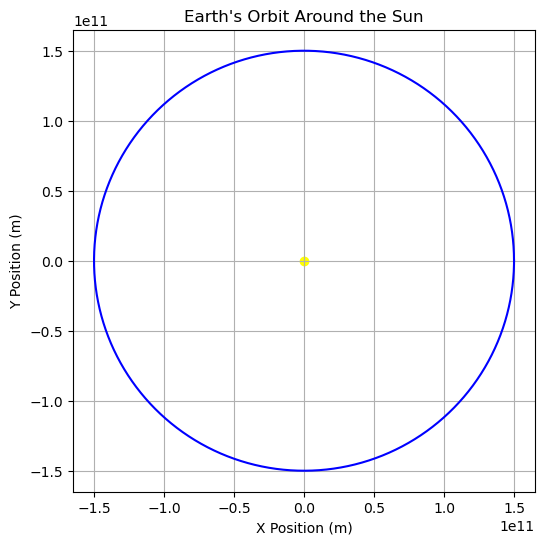

In [74]:
#I define the potential function
'''
def pot(x):
    return G*Mt*Ms/(x**2)
potential = MyFunction(pot)
print(potential.second_derivative(R,0.001))
print(derivative(pot,R,0.01,n=2))
'''
Ms,Mt,G,r = symbols('Ms Mt G r')
pot = -G*Ms*Mt/(r**2)
pot_prime = diff(pot,r)
pot_second = diff(pot,r,2)
#print(pot_second)
#print(pot_second.subs({r: R,Ms: 2*10**30,Mt: 6*10**24,G: 6.7*10**(-11)}))
#to control the derivative's convergence i can do this:
'''
step = [0.1, 0.01, 0.001, 0.0001]
for h in step:
    second_der_approx = (pot_prime.subs({r: R+h,Ms: 2*10**30,Mt: 6*10**24,G: 6.7*10**(-11)}) - pot_prime.subs({r: R,Ms: 2*10**30,Mt: 6*10**24,G: 6.7*10**(-11)})) / h
    print(h, " : ", second_der_approx)
'''
#x_prime(t+delta_t) = pot_second*delta_t + x_prime(t)
#x(t+delta_t) = x_prime*delta_t + x(t) 
days = 365
#initial condition
x_prime=[0] * (days + 1)
x=[0] * (days + 1)
x_prime[0]=30000 #(vel of earth)
x[0]=R
delta_t=1
#faccio che delta_t = 1 gg
for t in range(0,days,1):
    acc=-6.7*10**(-11) * 2*10**30 / x[t]**2
    x_prime[t + delta_t] = acc*delta_t + x_prime[t]
    x[t + delta_t] = x_prime[t]*delta_t + x[t]
    #print(x_prime[t])
    #print(x[t])



# Calculate Cartesian coordinates
earth_x = [x[t] * math.cos(2 * math.pi * t / days) for t in range(366)]
earth_y = [x[t] * math.sin(2 * math.pi * t / days) for t in range(366)]

# Plotting the trajectory
plt.figure(figsize=(8, 6))
plt.plot(earth_x, earth_y, label='Earth\'s Orbit', color='blue')
plt.scatter(0, 0, color='yellow', label='Sun')  # Sun at the origin
plt.title('Earth\'s Orbit Around the Sun')
plt.xlabel('X Position (m)')
plt.ylabel('Y Position (m)')
plt.gca().set_aspect('equal', adjustable='box')  # Set aspect ratio to make circles circular
#plt.legend()
plt.grid(True)
plt.show()
